In [121]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
categorized_emission_data = pd.read_csv('raw_data/Emissions_cat.csv', sep = ',', encoding = 'latin-1')

In [123]:
categorized_emission_data.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EI,Emissions intensities,5000,World,7231,Emissions (CO2eq),1718,Cereals excluding rice,1961,1961,gigagrams,105368.1674,A,"Aggregate, may include official, semi-official..."
1,EI,Emissions intensities,5000,World,7231,Emissions (CO2eq),1718,Cereals excluding rice,1962,1962,gigagrams,113427.2440,A,"Aggregate, may include official, semi-official..."
2,EI,Emissions intensities,5000,World,7231,Emissions (CO2eq),1718,Cereals excluding rice,1963,1963,gigagrams,118932.4544,A,"Aggregate, may include official, semi-official..."
3,EI,Emissions intensities,5000,World,7231,Emissions (CO2eq),1718,Cereals excluding rice,1964,1964,gigagrams,128025.1713,A,"Aggregate, may include official, semi-official..."
4,EI,Emissions intensities,5000,World,7231,Emissions (CO2eq),1718,Cereals excluding rice,1965,1965,gigagrams,137272.0303,A,"Aggregate, may include official, semi-official..."


In this dataset there are different types of meat and crops gathered with their corresponding emissions. There are the following categories:

In [124]:
categorized_emission_data.Item.unique()

array(['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle',
       'Milk, whole fresh cow', 'Meat, goat', 'Milk, whole fresh goat',
       'Meat, buffalo', 'Milk, whole fresh buffalo', 'Meat, sheep',
       'Milk, whole fresh sheep', 'Milk, whole fresh camel',
       'Meat, chicken', 'Eggs, hen, in shell', 'Meat, pig'], dtype=object)

As we can see, there are only two types of crop categories. We are therefore missing emission data for other categories. The same goes for meat, as we for example are missing emissions for camel. We will have to work with the little information that we have for now.

Since we are only interested in meat and crops we remove the milk and eggs categories. We also divide the dataset into emissions and production to make it easier normalizing later on (emissions/tonne produced). We are only interested in emissions on a world level for now.

In [125]:
relevant_data = categorized_emission_data[categorized_emission_data.Item.str.contains('|'.join(['Meat', 'Rice', 'Cereal']))]
emission_data = relevant_data[relevant_data.Element.str.contains('Emission')]
prod_data = relevant_data[relevant_data.Element.str.contains('Production')]

In [130]:
world_emission_data = emission_data[emission_data.Item.str.contains('|'.join(['Meat', 'Rice', 'Cereal']))]\
    [emission_data.Area.str.contains('World')]
world_prod_data = prod_data[prod_data.Item.str.contains('|'.join(['Meat', 'Rice', 'Cereal']))]\
    [prod_data.Area.str.contains('World')]

world_emission_data.to_pickle('./data/pickles/world_categorized_emissions.pkl')
world_prod_data.to_pickle('./data/pickles/world_categorized_production.pkl')

How have the emissions for crops and meat production developed since 1960? We plot the resulting amount of emissions per tonne produced on a world level. 

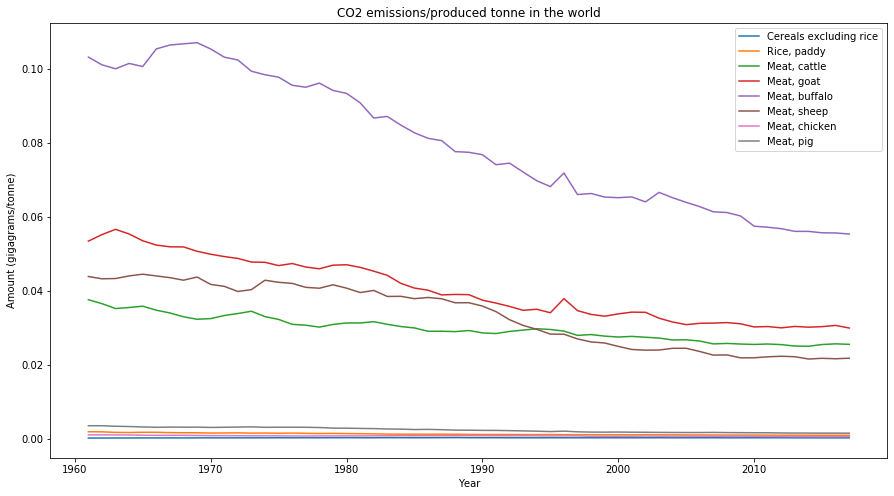

In [127]:
# Plot how much each type of meat emits for every tonne produced
fig = plt.figure(figsize = (15,8))

for item in world_emission_data.Item.unique():
    plt.plot(world_emission_data[world_emission_data['Item'] == item].Year.values, 
             world_emission_data[world_emission_data['Item'] == item].Value.values
             /(world_prod_data[world_prod_data['Item'] == item].Value.values))
    
plt.legend(world_emission_data.Item.unique())

plt.title('CO2 emissions/produced tonne in the world')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams/tonne)')
plt.show()

As we can see we are producing meat in a more sustainable way nowadays compared to 1960, since we are emitting less CO2 today per tonne meat produced compared to 1960. We can also see that the amount of emissions per tonne cereal/rice crops produced is a lot lower than the emissions for cattle, goat, buffalo and sheep. Pig and chicken have low emissions.

### Comparison to total agriculture emissions dataset
We want to know how much data we are missing in this categorized emissions dataset compared to our total agricultural emissions dataset.

In the total agriculture dataset, Europe emitted 985295.8185 gigagrams of CO2 for its total agriculture production. How much emissions do we have in this dataset for Europe in 1990?

In [128]:
meat_emissions_data = emission_data[emission_data.Item.str.contains('Meat')]
crops_emissions_data = emission_data[emission_data.Item.str.contains('|'.join(['Rice', 'Cereal']))]

meat_prod_data = prod_data[prod_data.Item.str.contains('Meat')]
crops_prod_data = prod_data[prod_data.Item.str.contains('|'.join(['Rice', 'Cereal']))]

meat_total = meat_emissions_data.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'})
meat_total['Item'] = 'Meat, total'
meat_total_emissions = meat_total.reset_index()

crops_total = crops_emissions_data.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'})
crops_total['Item'] = 'Crops, total'
crops_total_emissions = crops_total.reset_index()

In [129]:
meat_90 = meat_total_emissions[meat_total_emissions.Year == 1990][meat_total_emissions.Area.str.contains('Europe')].Value.array[0]
crops_90 = crops_total_emissions[crops_total_emissions.Year == 1990][crops_total_emissions.Area.str.contains('Europe')].Value.array[0]

emi_90 = meat_90+crops_90
print('We are missing this many gigagrams in this dataset for 1990 in Europe:', 985295.8185 - emi_90)

We are missing this many gigagrams in this dataset for 1990 in Europe: 414512.20999999996


We can therefore clearly see that we are missing a lot of data in this dataset which we realized earlier on when studying the categories. However from the plot shown above it is clearly visible that crops in general emits less CO2 than meat.